In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("adult_with_headers.csv")
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# Data Exploration and preprocessing:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


# no of null values

In [6]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

# Duplicate Rows

In [7]:
duplicate_rows=df[df.duplicated(keep=False)]
duplicate_rows

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
2303,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
3917,19,Private,251579,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,14,United-States,<=50K
4325,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
4767,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
4940,38,Private,207202,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,48,United-States,>50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
5579,27,Private,255582,HS-grad,9,Never-married,Machine-op-inspct,Not-in-family,White,Female,0,0,40,United-States,<=50K
5805,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
5842,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K


In [8]:
duplicate_rows.shape

(47, 15)

# Drop the Duplicate Rows

In [9]:
data=df.drop_duplicates()
data.reset_index(drop="index",inplace=True)
data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32533,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32534,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32535,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# Heat Map

<Axes: >

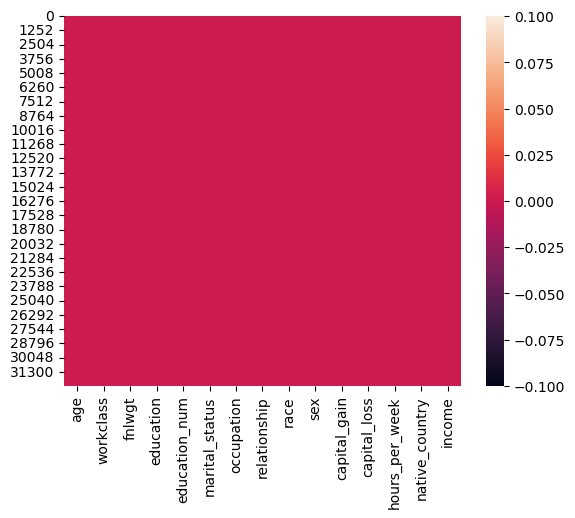

In [10]:
sns.heatmap(data.isnull())

In [11]:
print(data['workclass'].nunique())
data['workclass'].value_counts()

9


workclass
 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64

In [12]:
print(data['occupation'].nunique())
data['occupation'].value_counts()

15


occupation
 Prof-specialty       4136
 Craft-repair         4094
 Exec-managerial      4065
 Adm-clerical         3768
 Sales                3650
 Other-service        3291
 Machine-op-inspct    2000
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1369
 Farming-fishing       992
 Tech-support          927
 Protective-serv       649
 Priv-house-serv       147
 Armed-Forces            9
Name: count, dtype: int64

In [13]:
print(data['native_country'].nunique())
data['native_country'].value_counts()

42


native_country
 United-States                 29153
 Mexico                          639
 ?                               582
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Japan                            62
 Guatemala                        62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                  

# In all three columns has ' ?' value which is invalid

# ' ?' rows

In [14]:
nan_rows=data[data.isin([' ?']).sum(axis=1)>1]
nan_rows

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
69,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
106,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32506,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32507,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32515,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32517,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


# mode of cols

In [15]:
data['workclass'].mode()

0     Private
Name: workclass, dtype: object

In [16]:
data['occupation'].mode()

0     Prof-specialty
Name: occupation, dtype: object

In [17]:
data['native_country'].mode()

0     United-States
Name: native_country, dtype: object

# replacing ' ?' value with its columns mode

In [18]:
data.loc[:,'workclass']=data['workclass'].replace(' ?',data['workclass'].mode().iloc[0])
data.loc[:,'occupation']=data['occupation'].replace(' ?',data['occupation'].mode().iloc[0])
data.loc[:,'native_country']=data['native_country'].replace(' ?',data['native_country'].mode().iloc[0])
data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32533,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32534,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32535,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [19]:
print(data['workclass'].nunique())
data['workclass'].value_counts()

8


workclass
 Private             24509
 Self-emp-not-inc     2540
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64

In [20]:
print(data['occupation'].nunique())
data['occupation'].value_counts()

14


occupation
 Prof-specialty       5979
 Craft-repair         4094
 Exec-managerial      4065
 Adm-clerical         3768
 Sales                3650
 Other-service        3291
 Machine-op-inspct    2000
 Transport-moving     1597
 Handlers-cleaners    1369
 Farming-fishing       992
 Tech-support          927
 Protective-serv       649
 Priv-house-serv       147
 Armed-Forces            9
Name: count, dtype: int64

In [21]:
print(data['native_country'].nunique())
data['native_country'].value_counts()

41


native_country
 United-States                 29735
 Mexico                          639
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Japan                            62
 Guatemala                        62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                

In [22]:
data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32533,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32534,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32535,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# Categorical Columns

workclass
 Private             24509
 Self-emp-not-inc     2540
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64


<Axes: xlabel='workclass', ylabel='count'>

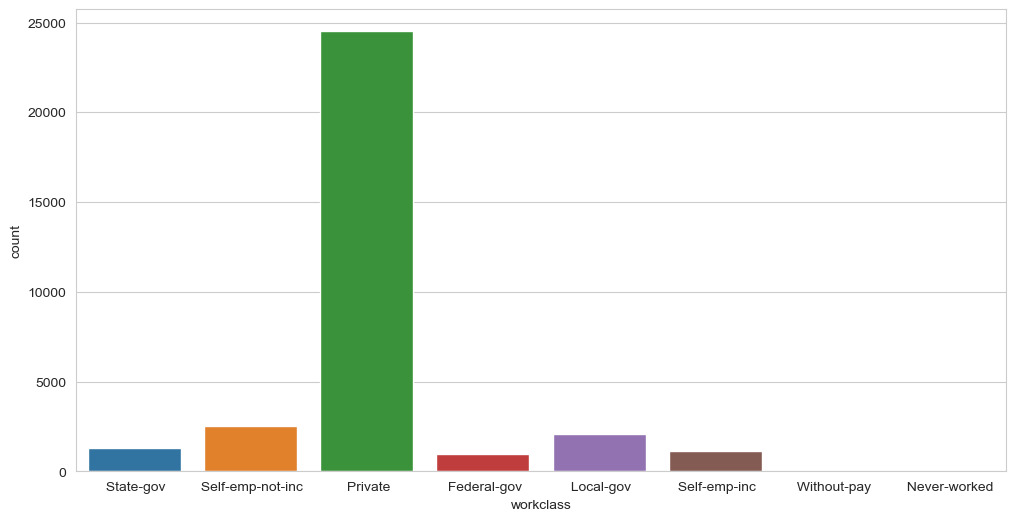

In [23]:
sns.set_style(style='whitegrid')
print(data["workclass"].value_counts())
plt.figure(figsize=(12,6))
sns.countplot(data=data,x='workclass')

# most of them are private workclass(24509)
# 7 members are never-worked

sex                 Female   Male
workclass                        
 Federal-gov           315    645
 Local-gov             835   1258
 Never-worked            2      5
 Private              8582  15927
 Self-emp-inc          135    981
 Self-emp-not-inc      399   2141
 State-gov             489    809
 Without-pay             5      9


<Axes: xlabel='workclass', ylabel='count'>

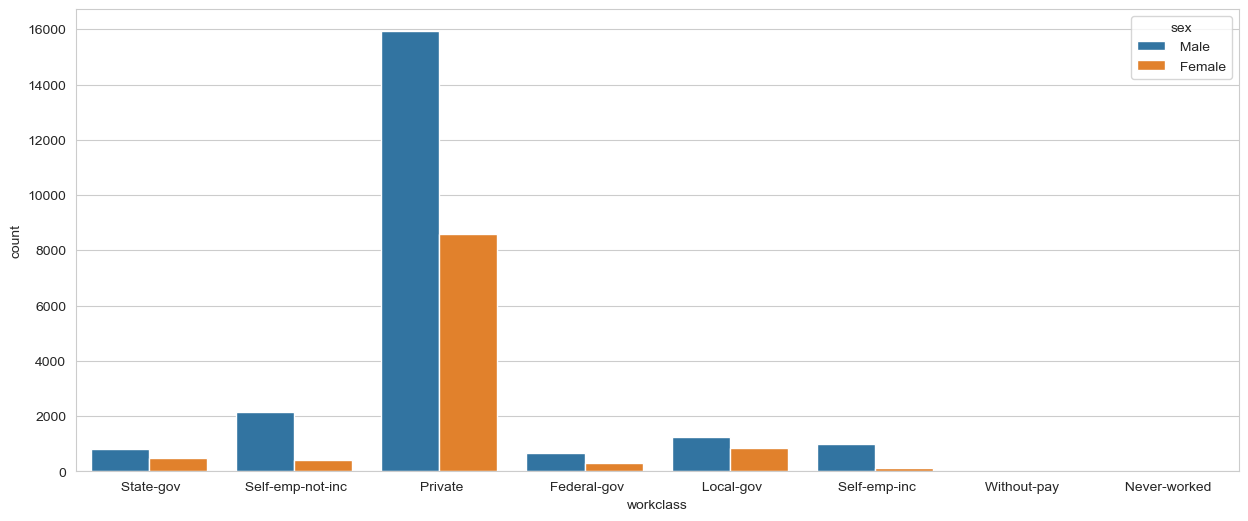

In [24]:
print(pd.crosstab(data['workclass'],data['sex']))
plt.figure(figsize=(15,6))
sns.countplot(data=data,x='workclass',hue='sex')

# 15927 Males are working private workspace
# 8582 Females are working private workspace

income              <=50K   >50K
workclass                       
 Federal-gov          589    371
 Local-gov           1476    617
 Never-worked           7      0
 Private            19357   5152
 Self-emp-inc         494    622
 Self-emp-not-inc    1816    724
 State-gov            945    353
 Without-pay           14      0


<Axes: xlabel='workclass', ylabel='count'>

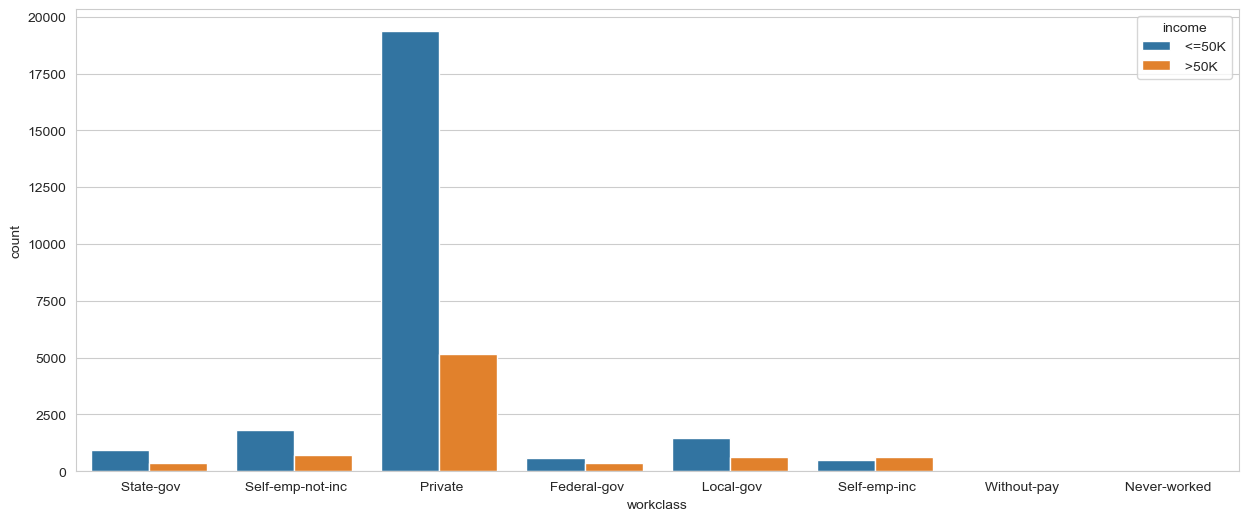

In [25]:
print(pd.crosstab(data['workclass'],data['income']))
plt.figure(figsize=(15,6))
sns.countplot(data=data,x='workclass',hue='income')

# 19357 members income in private workclass income is less than 50k
# 5152 members income in private workclass income is greater than 50k

education
 HS-grad         10494
 Some-college     7282
 Bachelors        5353
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: count, dtype: int64


<Axes: xlabel='education', ylabel='count'>

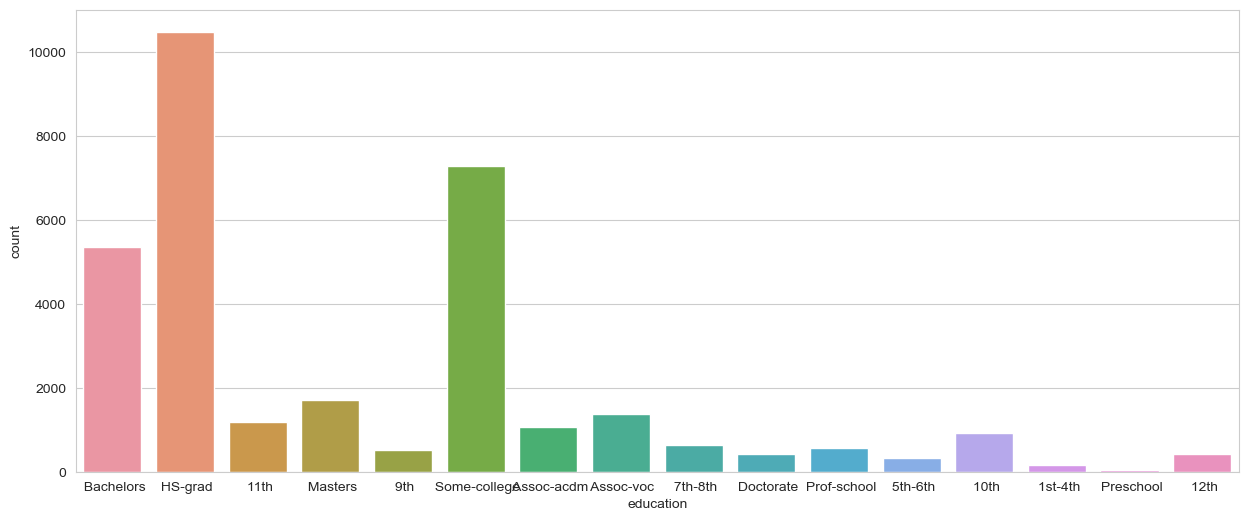

In [26]:
sns.set_style(style='whitegrid')
print(data["education"].value_counts())
plt.figure(figsize=(15,6))
sns.countplot(data=data,x='education')

# Most of them HS-graduates(10494)

income          <=50K   >50K
education                   
 10th             871     62
 11th            1115     60
 12th             400     33
 1st-4th          160      6
 5th-6th          316     16
 7th-8th          605     40
 9th              487     27
 Assoc-acdm       802    265
 Assoc-voc       1021    361
 Bachelors       3132   2221
 Doctorate        107    306
 HS-grad         8820   1674
 Masters          763    959
 Preschool         50      0
 Prof-school      153    423
 Some-college    5896   1386


<Axes: xlabel='education', ylabel='count'>

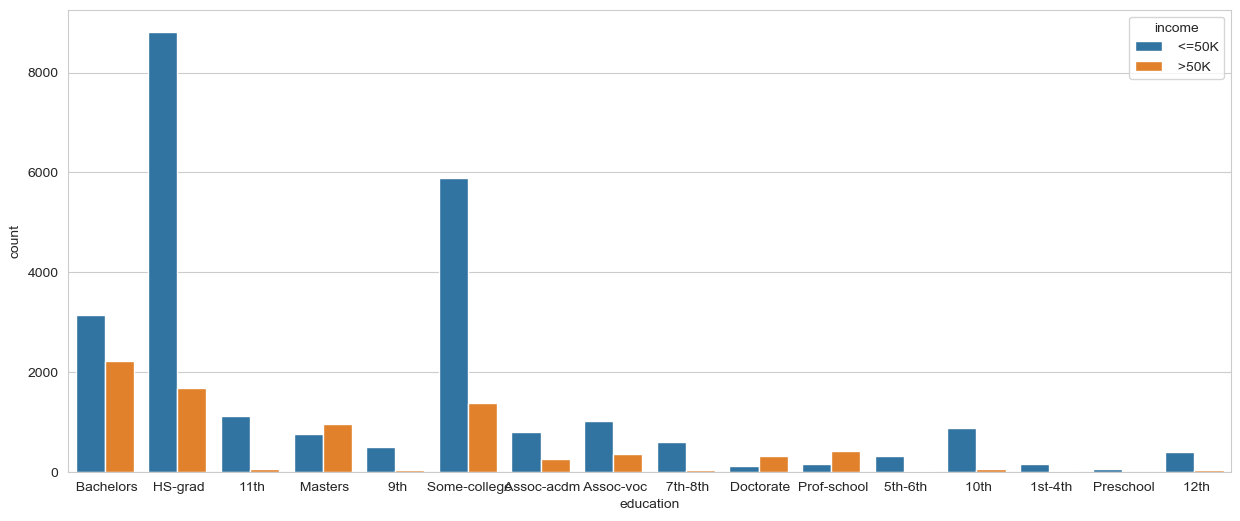

In [27]:
print(pd.crosstab(data['education'],data['income']))
plt.figure(figsize=(15,6))
sns.countplot(data=data,x='education',hue='income')

# There are more numbers than who's income is less than 50k in Masters,Doctorate,Prof-school

marital_status
 Married-civ-spouse       14970
 Never-married            10667
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: count, dtype: int64


<Axes: xlabel='marital_status', ylabel='count'>

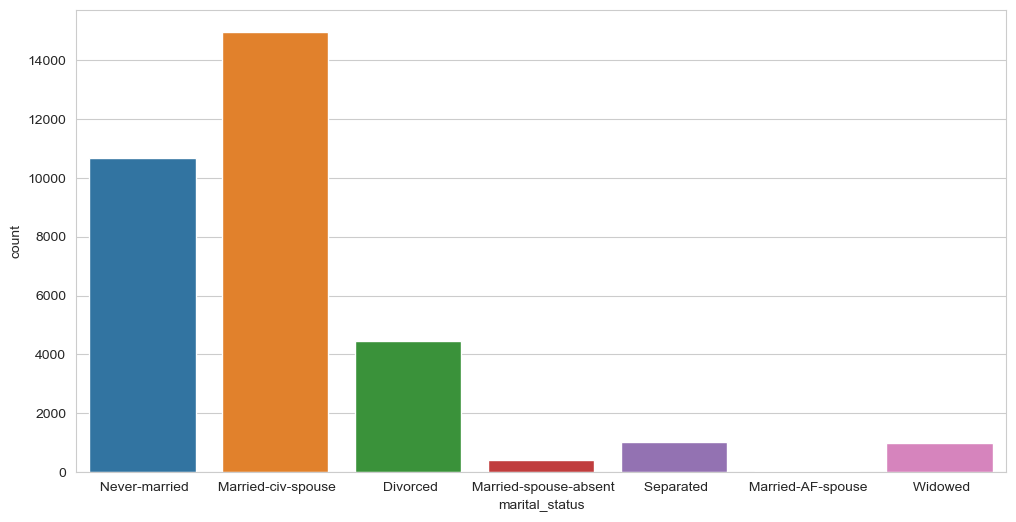

In [28]:
print(data["marital_status"].value_counts())
plt.figure(figsize=(12,6))
sns.countplot(data=data,x='marital_status')

# 14970 members are married are the majority

sex                      Female   Male
marital_status                        
 Divorced                  2670   1771
 Married-AF-spouse           14      9
 Married-civ-spouse        1657  13313
 Married-spouse-absent      205    213
 Never-married             4760   5907
 Separated                  631    394
 Widowed                    825    168


<Axes: xlabel='marital_status', ylabel='count'>

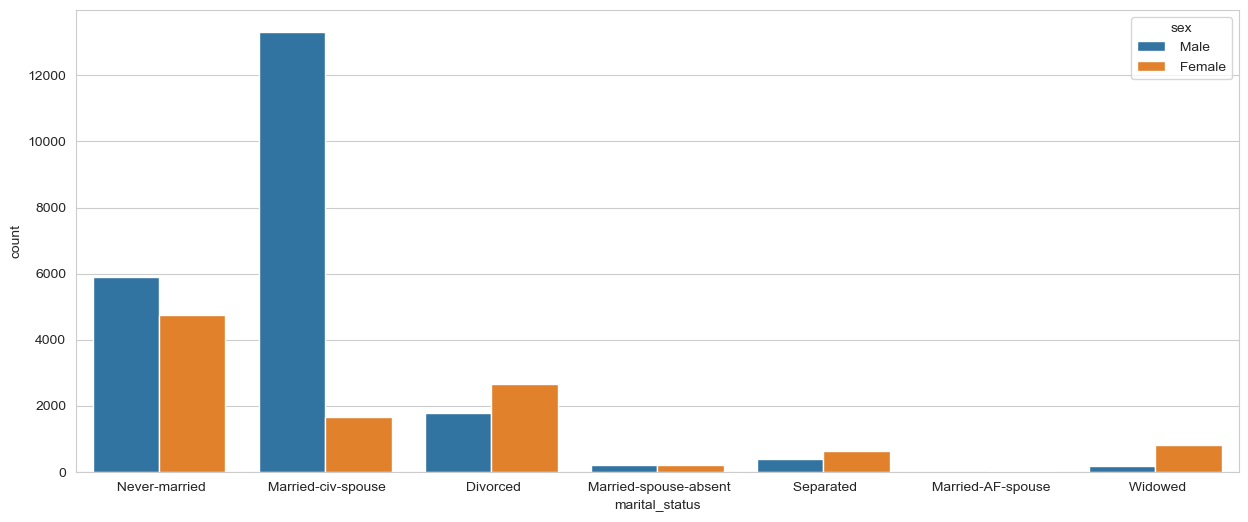

In [29]:
print(pd.crosstab(data['marital_status'],data['sex']))
plt.figure(figsize=(15,6))
sns.countplot(data=data,x='marital_status',hue='sex')

# Most of the females are got Divorced

income                   <=50K   >50K
marital_status                       
 Divorced                 3978    463
 Married-AF-spouse          13     10
 Married-civ-spouse       8280   6690
 Married-spouse-absent     384     34
 Never-married           10176    491
 Separated                 959     66
 Widowed                   908     85


<Axes: xlabel='marital_status', ylabel='count'>

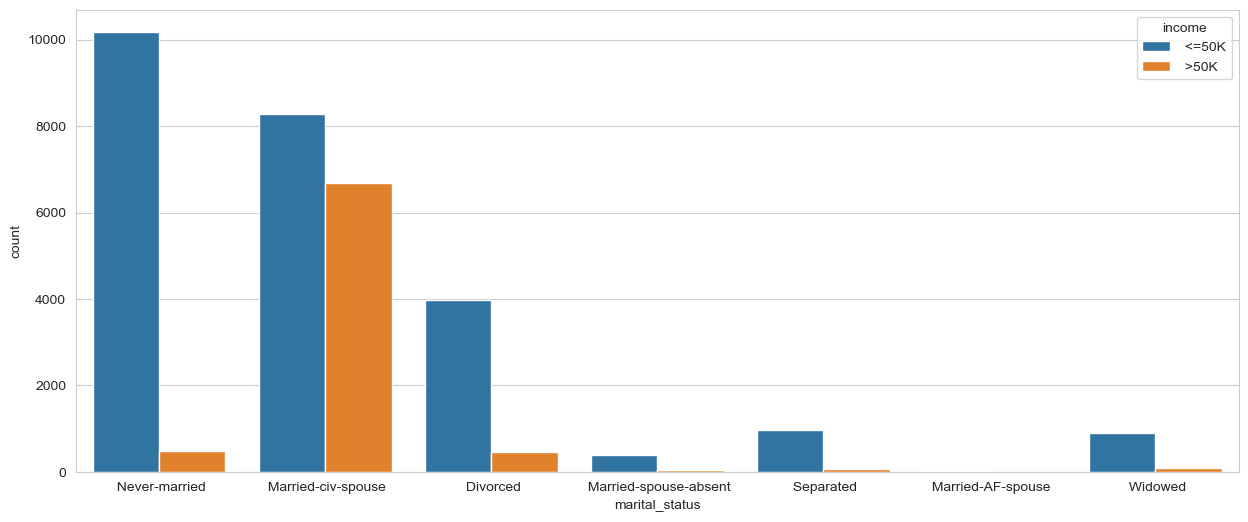

In [30]:
print(pd.crosstab(data['marital_status'],data['income']))
plt.figure(figsize=(15,6))
sns.countplot(data=data,x='marital_status',hue='income')

# Most of the people who are not married there income is less than 50k

occupation
 Prof-specialty       5979
 Craft-repair         4094
 Exec-managerial      4065
 Adm-clerical         3768
 Sales                3650
 Other-service        3291
 Machine-op-inspct    2000
 Transport-moving     1597
 Handlers-cleaners    1369
 Farming-fishing       992
 Tech-support          927
 Protective-serv       649
 Priv-house-serv       147
 Armed-Forces            9
Name: count, dtype: int64


<Axes: xlabel='occupation', ylabel='count'>

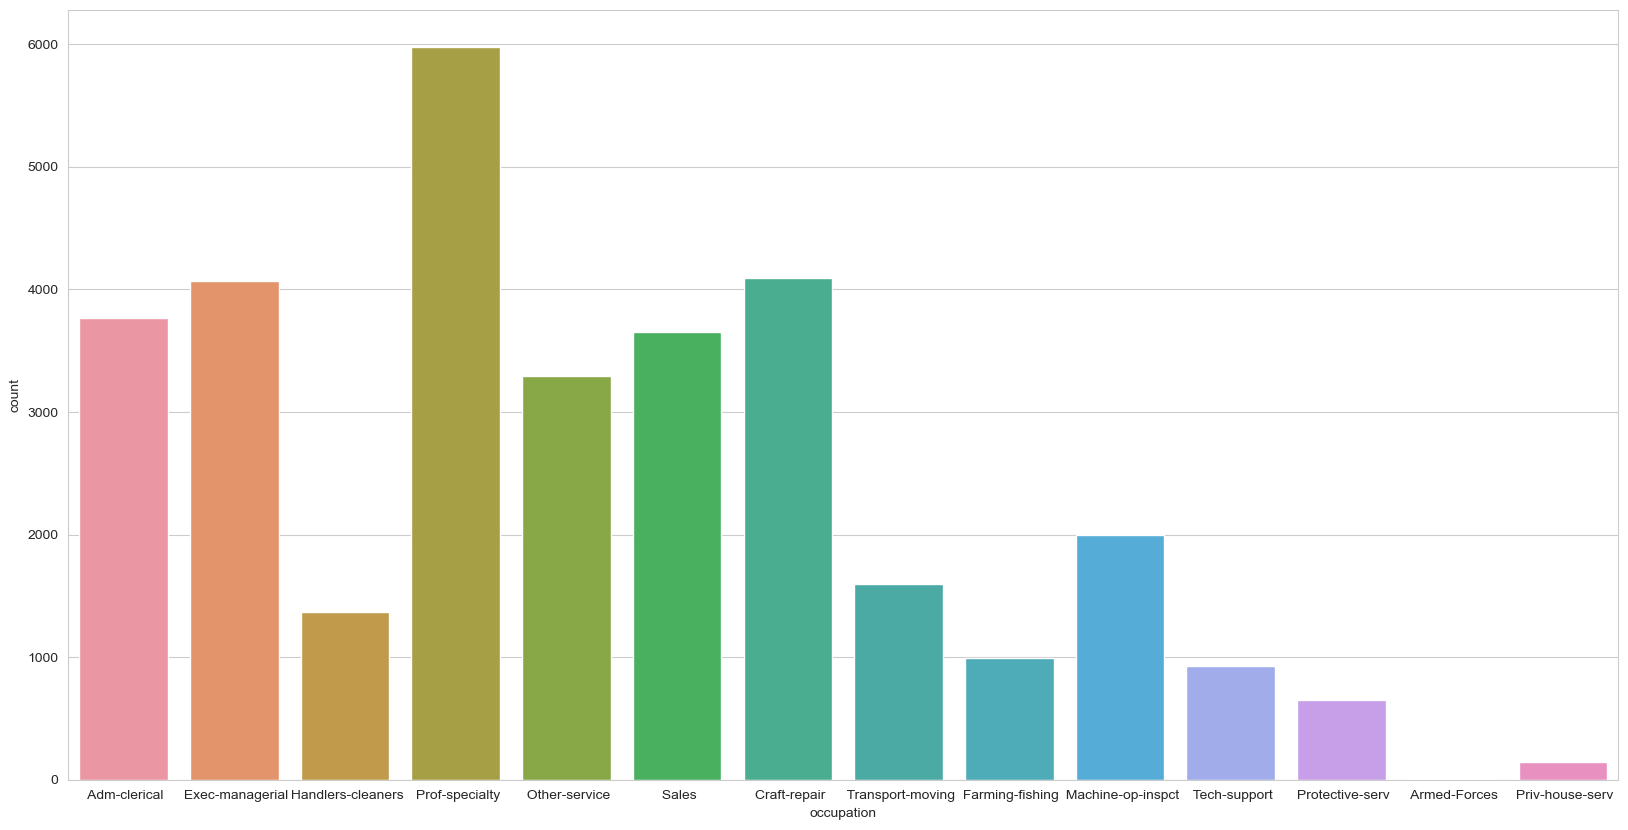

In [31]:
print(data["occupation"].value_counts())
plt.figure(figsize=(20,10))
sns.countplot(data=data,x='occupation')

# Cont of the Differenet Occupations
# most ot them are Prof-specialty(5979)

income               <=50K   >50K
occupation                       
 Adm-clerical         3261    507
 Armed-Forces            8      1
 Craft-repair         3165    929
 Exec-managerial      2097   1968
 Farming-fishing       877    115
 Handlers-cleaners    1283     86
 Machine-op-inspct    1751    249
 Other-service        3154    137
 Priv-house-serv       146      1
 Prof-specialty       3930   2049
 Protective-serv       438    211
 Sales                2667    983
 Tech-support          644    283
 Transport-moving     1277    320


<Axes: xlabel='occupation', ylabel='count'>

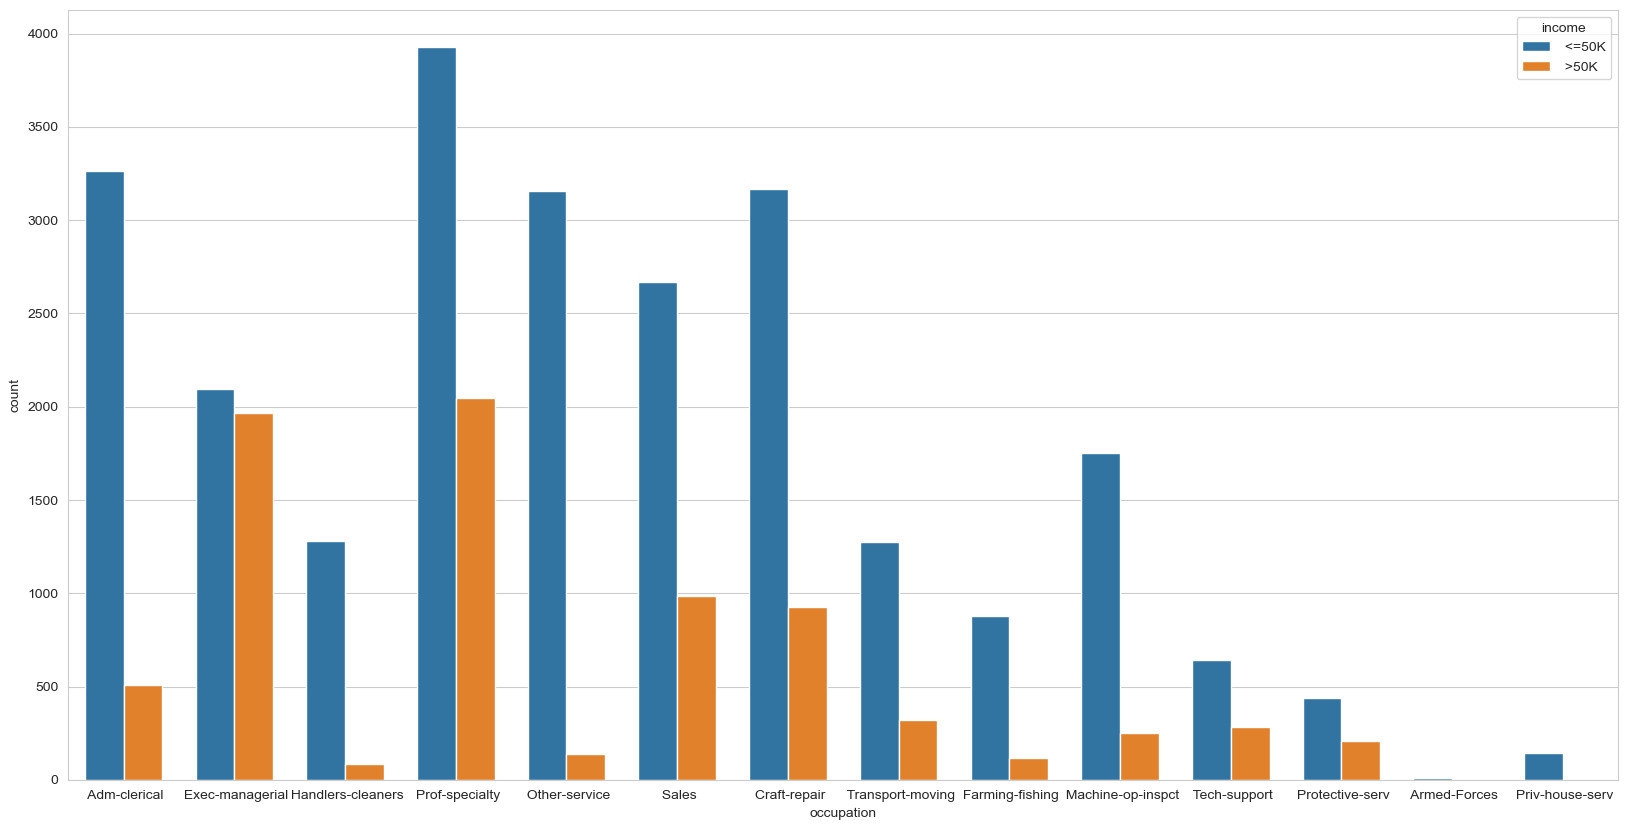

In [32]:
print(pd.crosstab(data['occupation'],data['income']))
plt.figure(figsize=(20,10))
sns.countplot(data=data,x='occupation',hue='income',width=0.7)

# In all Occupations there are more members income less than 50k than the income greater than 50k
# In Exec-managerial nearly equal members

relationship
 Husband           13187
 Not-in-family      8292
 Own-child          5064
 Unmarried          3445
 Wife               1568
 Other-relative      981
Name: count, dtype: int64


<Axes: xlabel='relationship', ylabel='count'>

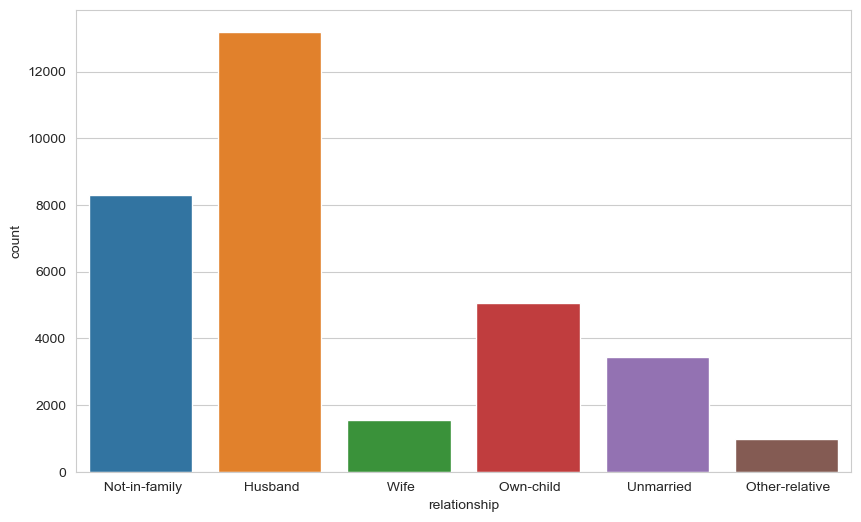

In [33]:
print(data["relationship"].value_counts())
plt.figure(figsize=(10,6))
sns.countplot(data=data,x='relationship')

# Majority of them are Husbands

race
 White                 27795
 Black                  3122
 Asian-Pac-Islander     1038
 Amer-Indian-Eskimo      311
 Other                   271
Name: count, dtype: int64


<Axes: xlabel='race', ylabel='count'>

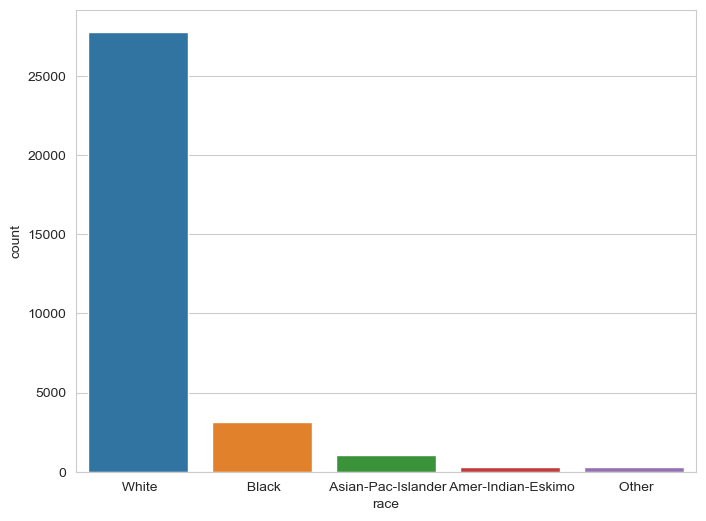

In [34]:
print(data["race"].value_counts())
plt.figure(figsize=(8,6))
sns.countplot(data=data,x='race')

sex
 Male      21775
 Female    10762
Name: count, dtype: int64


<Axes: xlabel='sex', ylabel='count'>

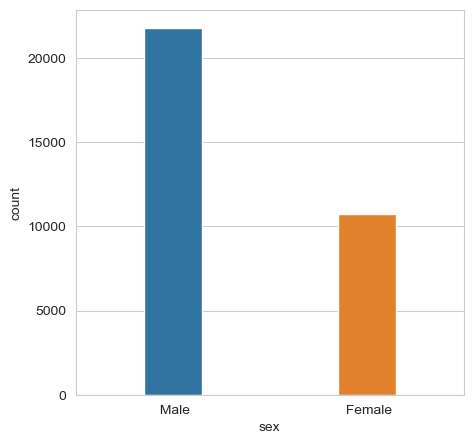

In [35]:
print(data["sex"].value_counts())
plt.figure(figsize=(5,5))
sns.countplot(data=data,x='sex',width=0.3)

# Most of them are Males(21775)

income    <=50K   >50K
sex                   
 Female    9583   1179
 Male     15115   6660


<Axes: xlabel='sex', ylabel='count'>

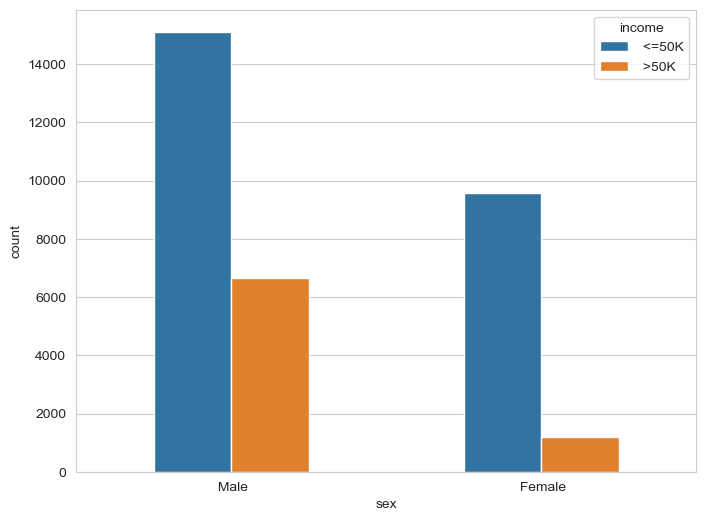

In [36]:
print(pd.crosstab(data['sex'],data['income']))
plt.figure(figsize=(8,6))
sns.countplot(data=data,x='sex',hue='income',width=0.5)

native_country
 United-States                 29735
 Mexico                          639
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Japan                            62
 Guatemala                        62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                

<Axes: xlabel='native_country', ylabel='count'>

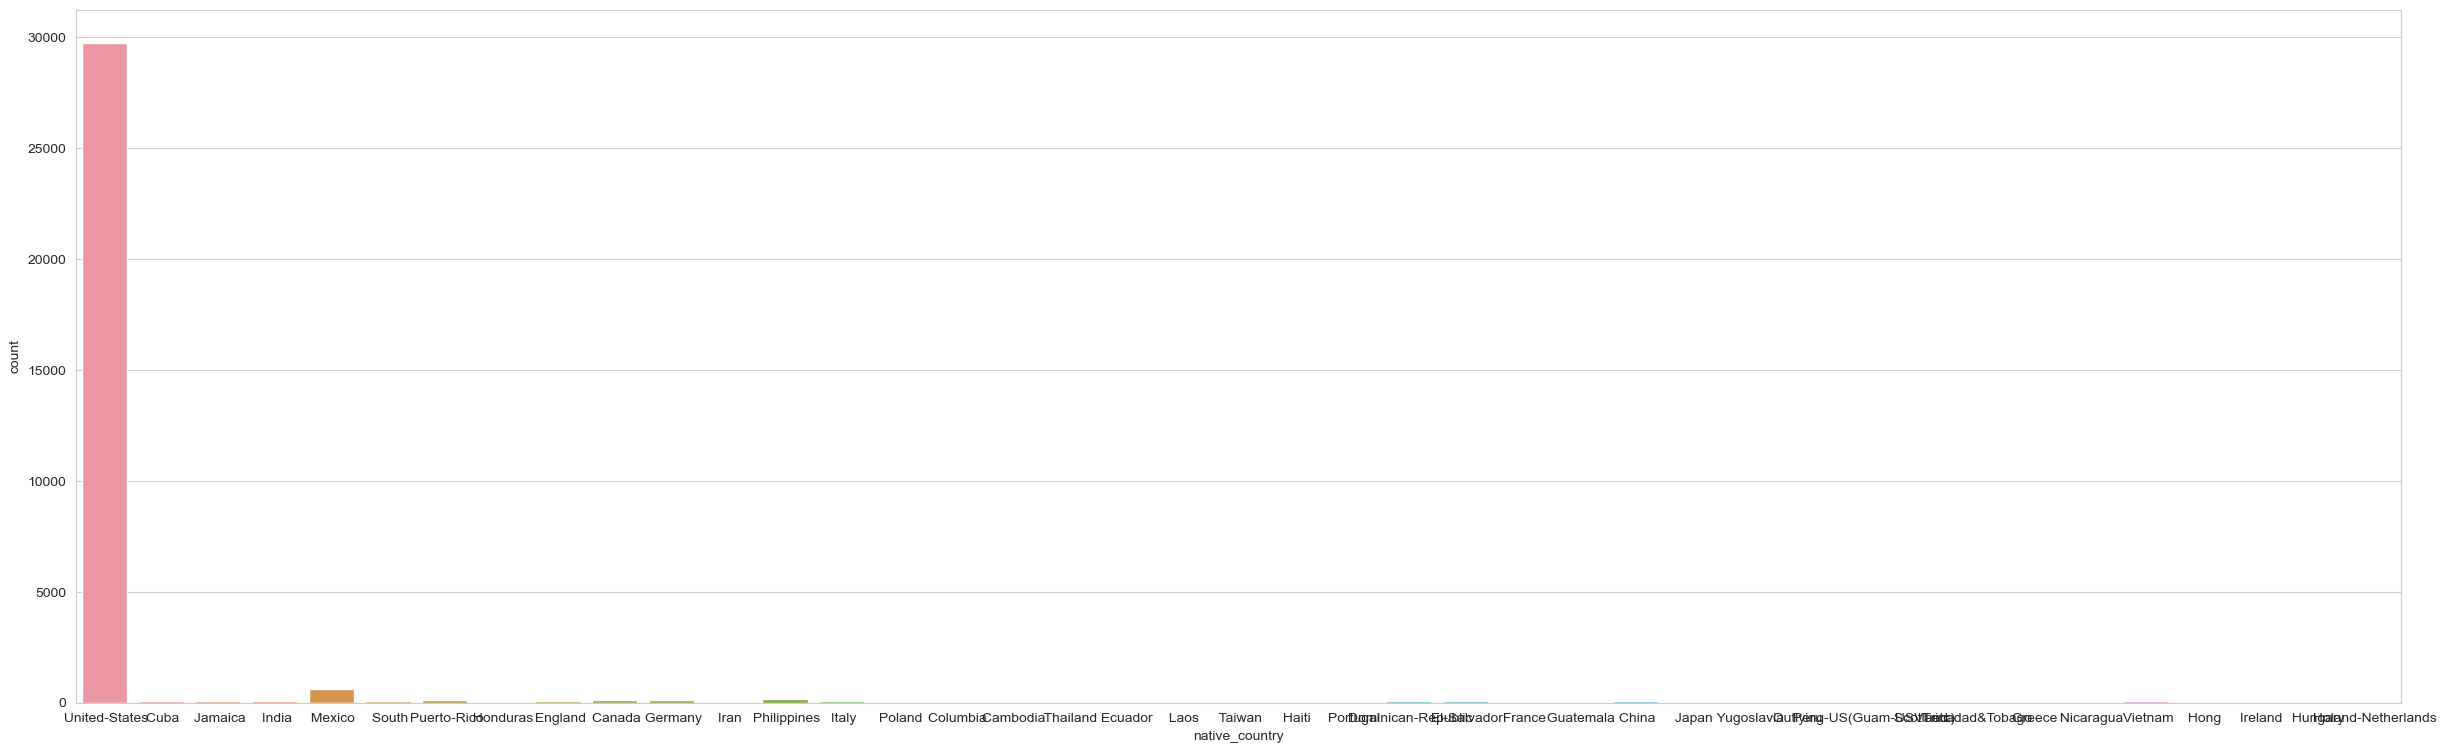

In [37]:
print(data["native_country"].value_counts())
plt.figure(figsize=(30,9))
sns.countplot(data=data,x='native_country')

# 90% of the members are belongs to United-States

<Axes: xlabel='native_country', ylabel='count'>

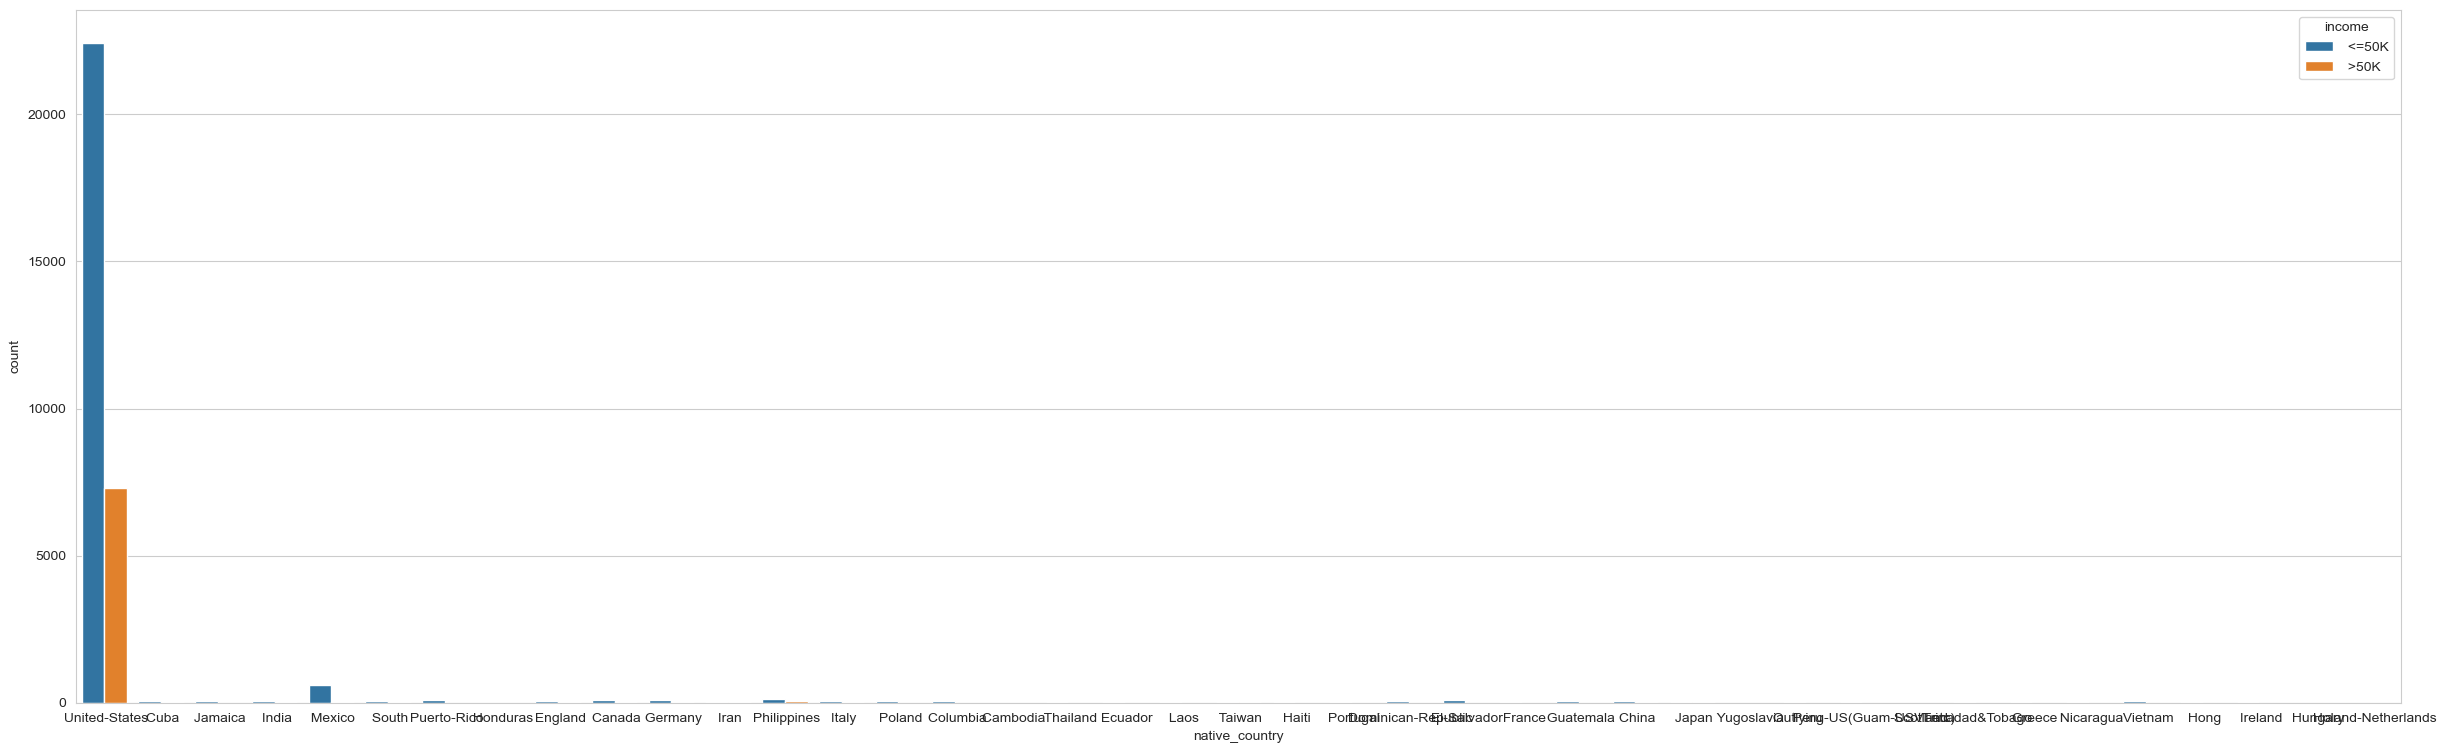

In [38]:
plt.figure(figsize=(30,9))
sns.countplot(data=data,x='native_country',hue='income')

# Creating new columns

In [39]:
data['capital_profit']=data['capital_gain']-data['capital_loss']
data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,capital_profit
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,2174
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,0
32533,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,0
32534,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,0
32535,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,0


# drop the columns capital gain and capital loss
# fnlwgt is the unnecessary column so we can remove it
# education_num column is unnecessary column because education column is given

In [40]:
data.drop(data[['capital_gain','capital_loss','fnlwgt','education_num']],axis=1,inplace=True)
data

,age,workclass,education,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,income,capital_profit
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K,2174
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K,0
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K,0
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K,0
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32532,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K,0
32533,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K,0
32534,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K,0
32535,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K,0


In [41]:
data["profit_per_hour"]=data['capital_profit']/data['hours_per_week']
data

,age,workclass,education,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,income,capital_profit,profit_per_hour
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K,2174,54.35
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K,0,0.00
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K,0,0.00
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K,0,0.00
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K,0,0.00
32533,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K,0,0.00
32534,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K,0,0.00
32535,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K,0,0.00


# Numerical Columns

In [42]:
numerical=data.select_dtypes(exclude='object')
numerical.head()

,age,hours_per_week,capital_profit,profit_per_hour
0,39,40,2174,54.35
1,50,13,0,0.00
2,38,40,0,0.00
3,53,40,0,0.00
4,28,40,0,0.00


In [43]:
numerical.corr()

,age,hours_per_week,capital_profit,profit_per_hour
age,1.000000,0.068515,0.074287,0.073529
hours_per_week,0.068515,1.000000,0.075207,0.011971
capital_profit,0.074287,0.075207,1.000000,0.834432
profit_per_hour,0.073529,0.011971,0.834432,1.000000


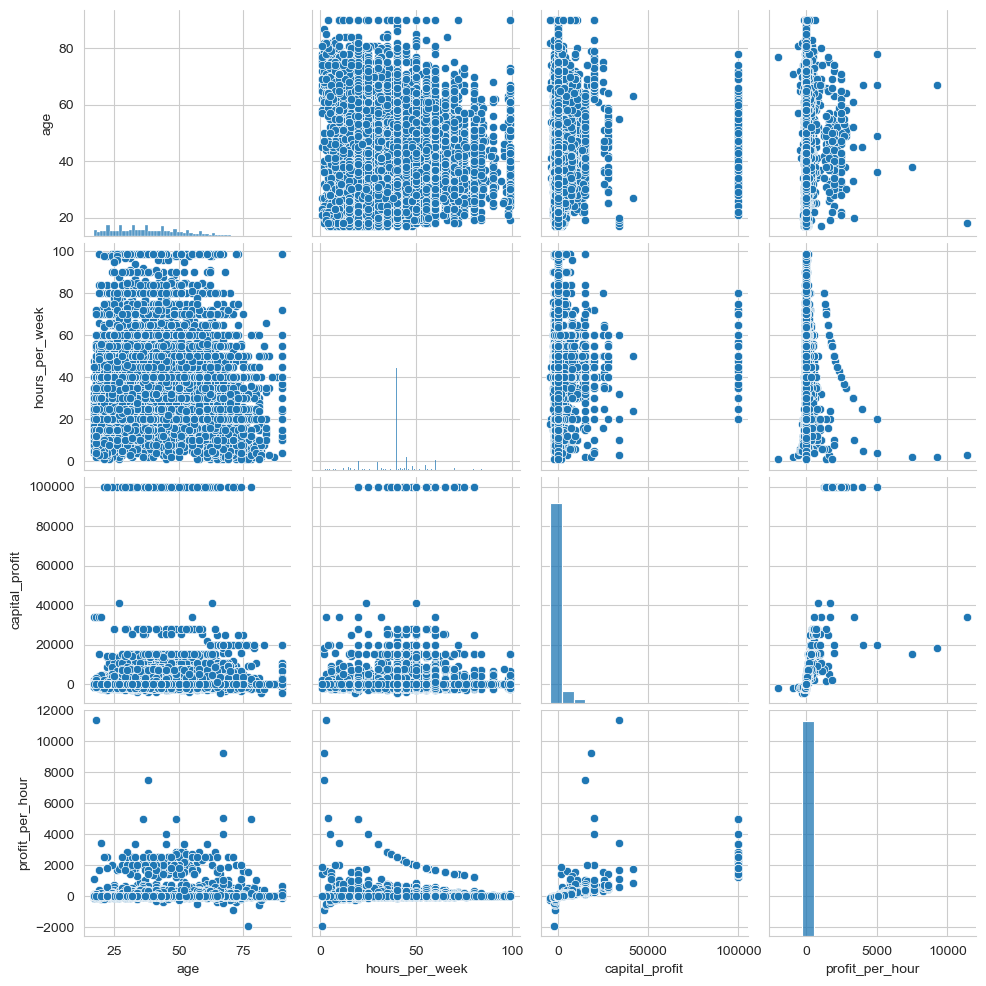

In [44]:
sns.pairplot(data)

# Categorical Columns

In [45]:
categorical=data.select_dtypes('object')
categorical.head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


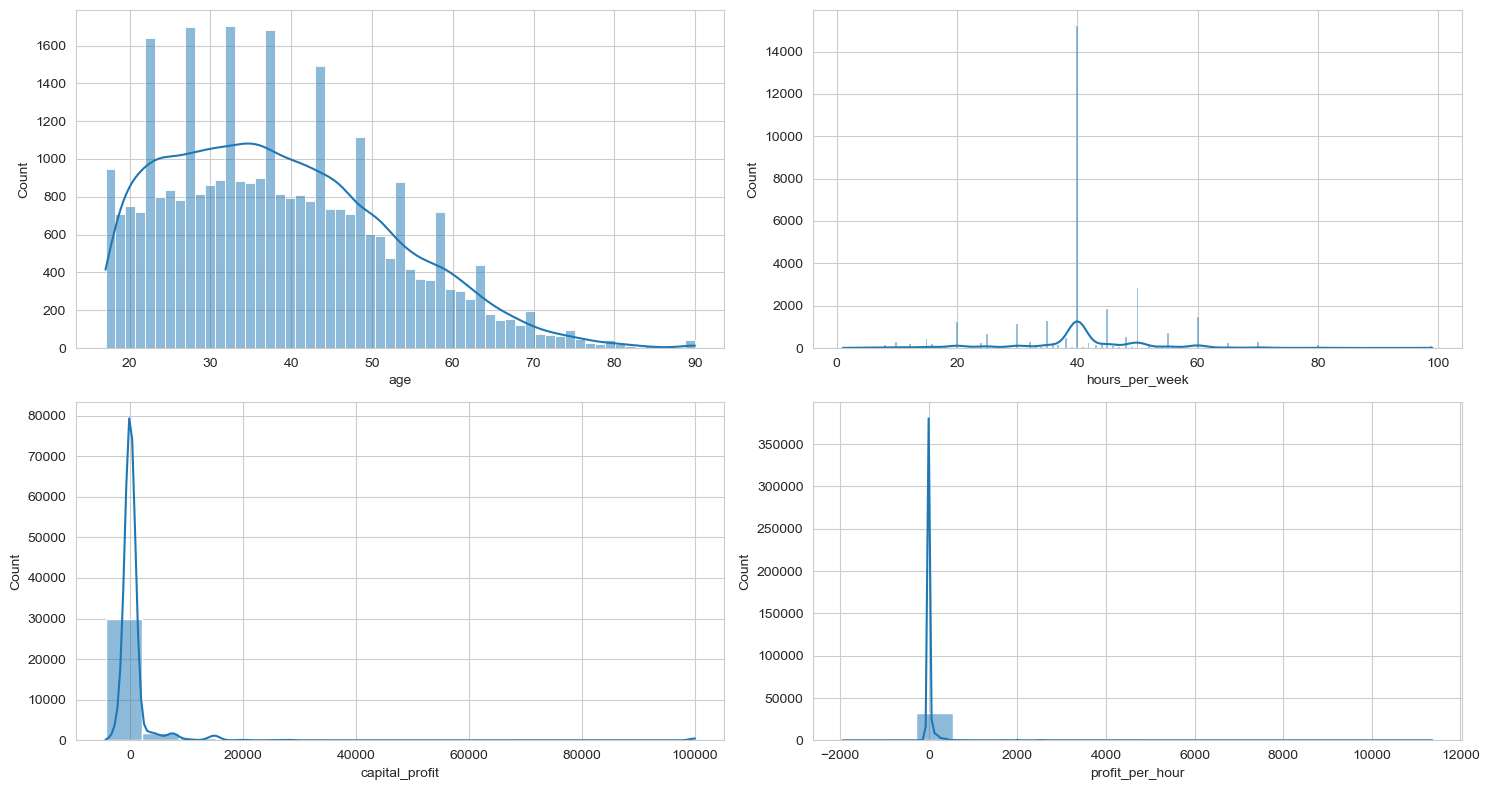

In [46]:
plt.figure(figsize=(15,8))

for i,column in enumerate(numerical.columns,1):
    plt.subplot(2,2,i)
    sns.histplot(x=data[column],kde=True)
    plt.xlabel(column)
plt.tight_layout()

# Boxplot

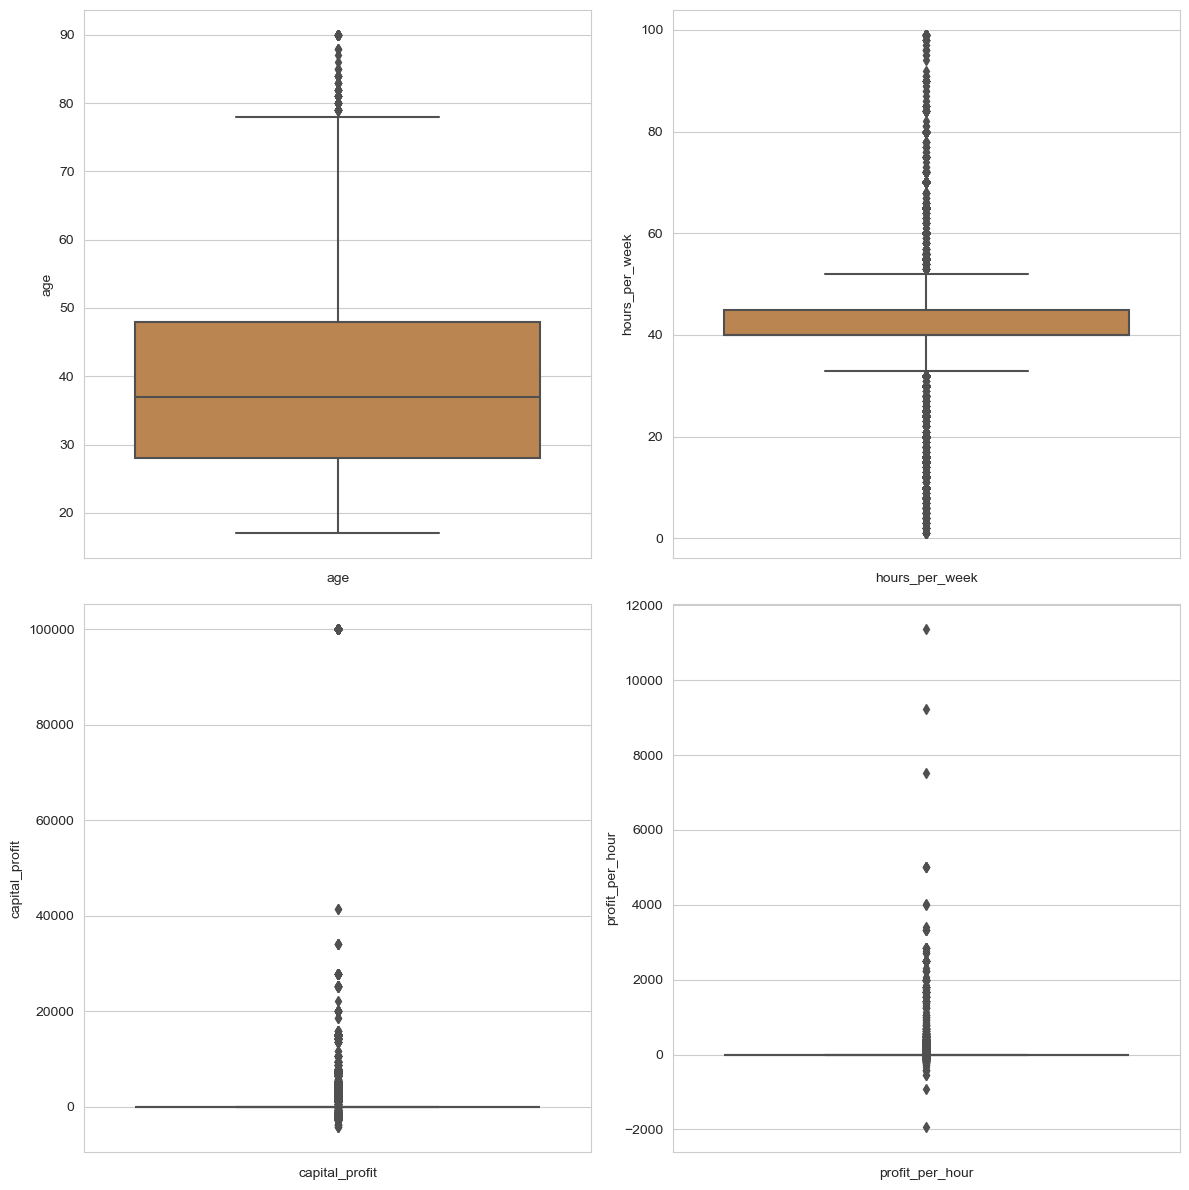

In [47]:
plt.figure(figsize=(12,12))

for i,column in enumerate(numerical.columns,1):
    plt.subplot(2,2,i)
    sns.boxplot(y=numerical[column],color='peru')
    plt.xlabel(column)

plt.tight_layout()

# Standardization and Min-Max Scaling

In [48]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [49]:
std_scaler=StandardScaler()
minmax_scaler=MinMaxScaler()

In [50]:
std_data=data.copy()
std_data[['age','hours_per_week','capital_profit','profit_per_hour']]=std_scaler.fit_transform(std_data[['age','hours_per_week','capital_profit','profit_per_hour']])
std_data

,age,workclass,education,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,income,capital_profit,profit_per_hour
0,0.030390,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,-0.035664,United-States,<=50K,0.159605,0.154509
1,0.836973,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,-2.222483,United-States,<=50K,-0.133720,-0.120227
2,-0.042936,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,-0.035664,United-States,<=50K,-0.133720,-0.120227
3,1.056950,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,-0.035664,United-States,<=50K,-0.133720,-0.120227
4,-0.776193,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,-0.035664,Cuba,<=50K,-0.133720,-0.120227
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,-0.849519,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,-0.197650,United-States,<=50K,-0.133720,-0.120227
32533,0.103716,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,-0.035664,United-States,>50K,-0.133720,-0.120227
32534,1.423579,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,-0.035664,United-States,<=50K,-0.133720,-0.120227
32535,-1.216148,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,-1.655530,United-States,<=50K,-0.133720,-0.120227


In [51]:
minmax_data=data.copy()
minmax_data[['age','hours_per_week','capital_profit','profit_per_hour']]=minmax_scaler.fit_transform(minmax_data[['age','hours_per_week','capital_profit','profit_per_hour']])
minmax_data

,age,workclass,education,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,income,capital_profit,profit_per_hour
0,0.301370,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,0.397959,United-States,<=50K,0.062575,0.150150
1,0.452055,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.122449,United-States,<=50K,0.041742,0.146067
2,0.287671,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.397959,United-States,<=50K,0.041742,0.146067
3,0.493151,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.397959,United-States,<=50K,0.041742,0.146067
4,0.150685,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.397959,Cuba,<=50K,0.041742,0.146067
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,0.136986,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0.377551,United-States,<=50K,0.041742,0.146067
32533,0.315068,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.397959,United-States,>50K,0.041742,0.146067
32534,0.561644,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0.397959,United-States,<=50K,0.041742,0.146067
32535,0.068493,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0.193878,United-States,<=50K,0.041742,0.146067


# Enconding techinques

In [52]:
for column in categorical:
    print(f'The number of categories in {column} is {categorical[column].nunique()}')

The number of categories in workclass is 8
The number of categories in education is 16
The number of categories in marital_status is 7
The number of categories in occupation is 14
The number of categories in relationship is 6
The number of categories in race is 5
The number of categories in sex is 2
The number of categories in native_country is 41
The number of categories in income is 2


# sex and race column has less than 5 categories
# all columns having more than 5 categories

# one hot encoding and label encoding 

In [53]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [54]:
OHE= OneHotEncoder(sparse_output=False)
label= LabelEncoder()

In [55]:
adults=std_data.copy()
adults

,age,workclass,education,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,income,capital_profit,profit_per_hour
0,0.030390,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,-0.035664,United-States,<=50K,0.159605,0.154509
1,0.836973,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,-2.222483,United-States,<=50K,-0.133720,-0.120227
2,-0.042936,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,-0.035664,United-States,<=50K,-0.133720,-0.120227
3,1.056950,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,-0.035664,United-States,<=50K,-0.133720,-0.120227
4,-0.776193,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,-0.035664,Cuba,<=50K,-0.133720,-0.120227
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,-0.849519,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,-0.197650,United-States,<=50K,-0.133720,-0.120227
32533,0.103716,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,-0.035664,United-States,>50K,-0.133720,-0.120227
32534,1.423579,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,-0.035664,United-States,<=50K,-0.133720,-0.120227
32535,-1.216148,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,-1.655530,United-States,<=50K,-0.133720,-0.120227


# Applying Label Encoding

In [56]:
adults['workclass']=label.fit_transform(adults['workclass'])
adults['education'] = label.fit_transform(adults['education'])
adults['marital_status']=label.fit_transform(adults['marital_status'])
adults['occupation']=label.fit_transform(adults['occupation'])
adults['relationship']=label.fit_transform(adults['relationship'])
adults['native_country']=label.fit_transform(adults['native_country'])

In [57]:
adults.head()

,age,workclass,education,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,income,capital_profit,profit_per_hour
0,0.030390,6,9,4,0,1,White,Male,-0.035664,38,<=50K,0.159605,0.154509
1,0.836973,5,9,2,3,0,White,Male,-2.222483,38,<=50K,-0.133720,-0.120227
2,-0.042936,3,11,0,5,1,White,Male,-0.035664,38,<=50K,-0.133720,-0.120227
3,1.056950,3,1,2,5,0,Black,Male,-0.035664,38,<=50K,-0.133720,-0.120227
4,-0.776193,3,9,2,9,5,Black,Female,-0.035664,4,<=50K,-0.133720,-0.120227


# Applying One-Hot Encoding

In [58]:
# another way is by using pandas Dummies
adults = pd.get_dummies(data=adults,columns =['race','sex','income'],dtype="int64",drop_first=True)
adults.head()

,age,workclass,education,marital_status,occupation,relationship,hours_per_week,native_country,capital_profit,profit_per_hour,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,income_ >50K
0,0.030390,6,9,4,0,1,-0.035664,38,0.159605,0.154509,0,0,0,1,1,0
1,0.836973,5,9,2,3,0,-2.222483,38,-0.133720,-0.120227,0,0,0,1,1,0
2,-0.042936,3,11,0,5,1,-0.035664,38,-0.133720,-0.120227,0,0,0,1,1,0
3,1.056950,3,1,2,5,0,-0.035664,38,-0.133720,-0.120227,0,1,0,0,1,0
4,-0.776193,3,9,2,9,5,-0.035664,4,-0.133720,-0.120227,0,1,0,0,0,0


### Pros and Cons of One-Hot Encoding and Label Encoding 
**Label Encoding :**

- *Pros*:

    - Requires less storage space than one-hot encoding because it simply assigns a numeric label to each category rather than creating a new column for each category.
    - Preserves the ordinal relationship between categories if it exists .For example any Hierarchy us present between the categories, Label Encoding stores the hierarchy(ex: [low, medium, high] , ['student'.'assistant professor' and 'professor']).
    
- *Cons* :
   
    - Label encoded features can imply an order or distance between categories that does not actually exist, which can negatively impact model performance.
    
**One-Hot Encoding :**

- *Pros:*

    - Preserves the categorical nature of the features without imposing any assumed relationships between them(ex: red,blue and black)
    - Allows the model to learn the unique influence of each category independently.
    
- *Cons :*

    - Requires more storage space than label encoding, that is if there are more categories it will create those many columns which will result in more number of columns.

In [59]:
for column in numerical.columns:
    print(f'The skewness of {column} is {numerical[column].skew()}')

The skewness of age is 0.5576631514973126
The skewness of hours_per_week is 0.22875887785250426
The skewness of capital_profit is 11.867498922342277
The skewness of profit_per_hour is 19.782282116117937


# Here capital_profit and profit_per_hour has high skewness
# so we can apply log transformation on it

In [60]:
adults['capital_profit'] = np.log1p(adults['capital_profit'])
adults['profit_per_hour'] = np.log1p(adults['profit_per_hour'])
adults.head()

,age,workclass,education,marital_status,occupation,relationship,hours_per_week,native_country,capital_profit,profit_per_hour,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,income_ >50K
0,0.030390,6,9,4,0,1,-0.035664,38,0.148080,0.143675,0,0,0,1,1,0
1,0.836973,5,9,2,3,0,-2.222483,38,-0.143547,-0.128092,0,0,0,1,1,0
2,-0.042936,3,11,0,5,1,-0.035664,38,-0.143547,-0.128092,0,0,0,1,1,0
3,1.056950,3,1,2,5,0,-0.035664,38,-0.143547,-0.128092,0,1,0,0,1,0
4,-0.776193,3,9,2,9,5,-0.035664,4,-0.143547,-0.128092,0,1,0,0,0,0


In [61]:
adults['profit_per_hour']=adults['profit_per_hour'].fillna(0)
adults.isnull().sum()

age                         0
workclass                   0
education                   0
marital_status              0
occupation                  0
relationship                0
hours_per_week              0
native_country              0
capital_profit              0
profit_per_hour             0
race_ Asian-Pac-Islander    0
race_ Black                 0
race_ Other                 0
race_ White                 0
sex_ Male                   0
income_ >50K                0
dtype: int64

# Feature Selection

# Isolation Forest

In [62]:
from sklearn.ensemble import IsolationForest
seed=4

In [63]:
outlier=IsolationForest(random_state=seed)
outlier.fit(adults)

IsolationForest(random_state=4)

In [64]:
predict_outliers=outlier.predict(adults)
labels=pd.Series(predict_outliers)
print(labels.value_counts())
labels

 1    27681
-1     4856
Name: count, dtype: int64


0        1
1        1
2        1
3        1
4       -1
        ..
32532    1
32533    1
32534    1
32535    1
32536   -1
Length: 32537, dtype: int32

# -1 indicates outliers
# try with contamination values

In [65]:
outlier1 = IsolationForest(random_state=seed,contamination=0.005)
outlier1.fit(adults)

IsolationForest(contamination=0.005, random_state=4)

In [66]:
predict_outliers=outlier1.predict(adults)
labels1=pd.Series(predict_outliers)
print(labels1.value_counts())
labels1

 1    32374
-1      163
Name: count, dtype: int64


0        1
1        1
2        1
3        1
4        1
        ..
32532    1
32533    1
32534    1
32535    1
32536    1
Length: 32537, dtype: int32

In [67]:
outlier2 = IsolationForest(random_state=seed,contamination=0.05)
outlier2.fit(adults)

IsolationForest(contamination=0.05, random_state=4)

In [68]:
predict_outliers=outlier2.predict(adults)
labels2=pd.Series(predict_outliers)
print(labels2.value_counts())
labels2

 1    30910
-1     1627
Name: count, dtype: int64


0        1
1        1
2        1
3        1
4       -1
        ..
32532    1
32533    1
32534    1
32535    1
32536   -1
Length: 32537, dtype: int32

# So let's take the contamination value as 0.025

In [69]:
outlier=IsolationForest(random_state=seed,contamination=0.025)
outlier.fit(adults)

IsolationForest(contamination=0.025, random_state=4)

In [70]:
predict_outliers=outlier.predict(adults)
labels=pd.Series(predict_outliers)
print(labels.value_counts())
labels

 1    31723
-1      814
Name: count, dtype: int64


0        1
1        1
2        1
3        1
4        1
        ..
32532    1
32533    1
32534    1
32535    1
32536   -1
Length: 32537, dtype: int32

# Outlier rows

In [71]:
data['labels']=labels
data[data['labels']==-1]

,age,workclass,education,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,income,capital_profit,profit_per_hour,labels
11,30,State-gov,Bachelors,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,40,India,>50K,0,0.000000,-1
52,47,Private,Prof-school,Married-civ-spouse,Prof-specialty,Wife,White,Female,60,Honduras,>50K,-1902,-31.700000,-1
93,30,Private,HS-grad,Married-civ-spouse,Sales,Wife,Asian-Pac-Islander,Female,35,United-States,<=50K,-1573,-44.942857,-1
106,17,Private,10th,Never-married,Prof-specialty,Own-child,White,Female,32,United-States,<=50K,34095,1065.468750,-1
157,71,Self-emp-not-inc,Some-college,Separated,Sales,Unmarried,Black,Male,2,United-States,<=50K,-1816,-908.000000,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32455,64,State-gov,7th-8th,Married-civ-spouse,Other-service,Wife,Black,Female,40,United-States,<=50K,0,0.000000,-1
32484,45,Private,10th,Divorced,Other-service,Not-in-family,Black,Female,38,Dominican-Republic,<=50K,0,0.000000,-1
32494,57,Local-gov,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,40,United-States,>50K,99999,2499.975000,-1
32514,38,Private,Bachelors,Divorced,Prof-specialty,Unmarried,Black,Female,45,United-States,>50K,15020,333.777778,-1


In [72]:
data[data['labels']==1]

,age,workclass,education,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,income,capital_profit,profit_per_hour,labels
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K,2174,54.35,1
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K,0,0.00,1
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K,0,0.00,1
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K,0,0.00,1
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K,0,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32531,22,Private,Some-college,Never-married,Protective-serv,Not-in-family,White,Male,40,United-States,<=50K,0,0.00,1
32532,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K,0,0.00,1
32533,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K,0,0.00,1
32534,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K,0,0.00,1


# PPS(predictive power score)

In [73]:
import ppscore as pps

In [74]:
pps.score(adults,'age','hours_per_week')

{'x': 'age',
 'y': 'hours_per_week',
 'ppscore': 0,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'baseline_score': 0.6034811192637813,
 'model_score': 0.6349169585323698,
 'model': DecisionTreeRegressor()}

# to get all possible combinations

In [75]:
scores=pps.matrix(data)
scores

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,age,age,1.000000e+00,predict_itself,True,None,0.000000,1.000000,None
1,age,workclass,1.871725e-03,classification,True,weighted F1,0.659616,0.660253,DecisionTreeClassifier()
2,age,education,6.124723e-02,classification,True,weighted F1,0.189800,0.239423,DecisionTreeClassifier()
3,age,marital_status,3.188866e-01,classification,True,weighted F1,0.345800,0.554416,DecisionTreeClassifier()
4,age,occupation,4.087761e-02,classification,True,weighted F1,0.108200,0.144655,DecisionTreeClassifier()
...,...,...,...,...,...,...,...,...,...
191,labels,native_country,3.679218e-07,classification,True,weighted F1,0.876423,0.876424,DecisionTreeClassifier()
192,labels,income,8.116805e-02,classification,True,weighted F1,0.646362,0.675066,DecisionTreeClassifier()
193,labels,capital_profit,0.000000e+00,regression,True,mean absolute error,1245.773200,1866.022724,DecisionTreeRegressor()
194,labels,profit_per_hour,0.000000e+00,regression,True,mean absolute error,30.082223,44.276878,DecisionTreeRegressor()


# filter the scores

In [76]:
scores[(scores['ppscore'] >0.3) & (scores['ppscore'] != 1)]

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
3,age,marital_status,0.318887,classification,True,weighted F1,0.345800,0.554416,DecisionTreeClassifier()
47,marital_status,relationship,0.396140,classification,True,weighted F1,0.268800,0.558457,DecisionTreeClassifier()
49,marital_status,sex,0.314932,classification,True,weighted F1,0.559200,0.698022,DecisionTreeClassifier()
63,occupation,sex,0.325885,classification,True,weighted F1,0.559200,0.702850,DecisionTreeClassifier()
73,relationship,marital_status,0.647172,classification,True,weighted F1,0.345800,0.769180,DecisionTreeClassifier()
77,relationship,sex,0.413951,classification,True,weighted F1,0.559200,0.741669,DecisionTreeClassifier()
164,capital_profit,income,0.419816,classification,True,weighted F1,0.646362,0.794825,DecisionTreeClassifier()
166,capital_profit,profit_per_hour,0.735897,regression,True,mean absolute error,30.082223,7.944792,DecisionTreeRegressor()
178,profit_per_hour,income,0.357568,classification,True,weighted F1,0.646362,0.772811,DecisionTreeClassifier()
179,profit_per_hour,capital_profit,0.853261,regression,True,mean absolute error,1245.773200,182.803100,DecisionTreeRegressor()


In [77]:
scores[scores['y']=='income']

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
10,age,income,1.685320e-02,classification,True,weighted F1,0.646362,0.652322,DecisionTreeClassifier()
24,workclass,income,1.092573e-01,classification,True,weighted F1,0.646362,0.684999,DecisionTreeClassifier()
38,education,income,2.471221e-01,classification,True,weighted F1,0.646362,0.733754,DecisionTreeClassifier()
52,marital_status,income,0.000000e+00,classification,True,weighted F1,0.646362,0.646166,DecisionTreeClassifier()
66,occupation,income,4.651070e-02,classification,True,weighted F1,0.646362,0.662810,DecisionTreeClassifier()
80,relationship,income,1.260964e-07,classification,True,weighted F1,0.646362,0.646362,DecisionTreeClassifier()
94,race,income,1.260964e-07,classification,True,weighted F1,0.646362,0.646362,DecisionTreeClassifier()
108,sex,income,1.260964e-07,classification,True,weighted F1,0.646362,0.646362,DecisionTreeClassifier()
122,hours_per_week,income,7.978346e-03,classification,True,weighted F1,0.646362,0.649183,DecisionTreeClassifier()
136,native_country,income,9.880092e-03,classification,True,weighted F1,0.646362,0.649856,DecisionTreeClassifier()


orrelation matrix shows the relationship between features using the values from a range of -1 to 1.Correlation value close to 1 indicate a strong (postive) relationship between features and 0 or close to zero indicates very weak or no relationship at all.
Similarly value close to -1 indicates strong negative relationship between features.

Whereas coming to Predictive Power Score, it is also used to detect relationship between the features. PP score values lies in the range of 0 to 1. Value close to 1 indicates that the two features have a strong relation between them whereas values close to 0 indicate no relation. Basically values close to 1 indicates a particular column has high predictive power to predict the target value.

But, by using Correlation we are able to find only linear relationship between features. Whereas using Predictive Power Score we are also able to find linear as well as Non-Linear relationship between features.